In [1]:
#!pip install Keras
import numpy as np
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import models 
import keras
from scipy.signal import blackman
from ast import literal_eval
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import time

In [2]:
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

In [3]:
!pip install import-ipynb
import import_ipynb

In [4]:
from create_model import CreateModel

importing Jupyter notebook from create_model.ipynb


# Vector representation of v2 

# LSTM model

# Kmeans algorithm

## Dataset

In [5]:
url = 'data/'
url_image='image_data/'

In [6]:
# Reading a csv file named df_node_kmeans_algorithms
df_data = pd.read_csv(url+'df_node_kmeans_algorithms.csv',converters={'tf-idf': eval,'tf-idf_after_norm':eval}) 
df_data.shape

(514, 7)

In [7]:
df_data.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  kmeans_clusters  
0             109.704459                0  
1             107.480757                0  
2             104.355574                0  
3              90.295322                0  
4              94.068587                0

In [8]:
df_data['kmeans_clusters'].value_counts()

0    409
4     95
2      5
3      4
1      1
Name: kmeans_clusters, dtype: int64

In [9]:
# Create object of class CreateModel
model_obj=CreateModel()

In [10]:
# Get 10 words with the highest text rank
word_list=model_obj.words_highest_text_rank(df_data)
word_list

['tel_aviv',
 'design',
 'works',
 'develop',
 'product',
 'engineer',
 'technologies',
 'skills',
 'look',
 'team',
 'company']

In [11]:
number_kmeans_clusters = len(set(df_data.kmeans_clusters))
print( 'Number of clusters for model input: ',number_kmeans_clusters)

Number of clusters for model input:  5


In [12]:
# Calculate an average vector for each cluster
dict_data=model_obj.average_vectors(df_data,number_kmeans_clusters, 'kmeans_clusters')
# Rename column
df_vectors_clusters=pd.DataFrame.from_dict([dict_data]).T.rename(columns = {0: 'dataset_clasters'}, inplace = False)
df_vectors_clusters

dataset_clasters
cluster 0  [13.568863524021507, 14.428040848532303, 11.91...
cluster 1  [0.3018288257225134, 0.0, 0.2829645241148563, ...
cluster 2  [0.3297103559914386, 0.34316792154210957, 0.65...
cluster 3  [0.0757514757929913, 0.09275690913427505, 0.30...
cluster 4  [2.448640626257563, 4.289485673395798, 3.94085...

In [13]:
# Enter the dataset_clasters values into the dataset
dataset = np.array(df_vectors_clusters['dataset_clasters'].to_list())
dataset.shape

(5, 699)

In [14]:
# Choose a number of time steps
n_steps = 50
# Call to function flat_split_sequences_validation
X_train, y_train, X_test, y_test, X_valid, y_valid = model_obj.flat_split_sequences_validation(dataset, n_steps)

In [15]:
y_train_lenght, y_valid_lenght, y_test_lenght= model_obj.get_lenght(X_train, X_valid, y_test)

y_train lenght : 389 , y_valid lenght : 129 , y_test lenght : 131


In [16]:
# Convert into input/output- Call to function reshape_data
X_train, y_train, X_test, y_test, X_valid, y_valid=model_obj.reshape_data(X_train, y_train, X_test, y_test, X_valid, y_valid, n_steps)
n_features = X_train.shape[2]
n_features

1

In [17]:
# Get predictive input data
full_X_train, full_y_train, full_X_test, full_y_test, full_X_valid, full_y_valid=model_obj.get_data_predict( df_data, n_steps)

# log-cosh

In [78]:
name_model='model_LSTM_cluster/LogCosh_LSTM_kmeans_cluster_model_v2'
name_history='history_LSTM_cluster/LogCosh_LSTM_kmeans_cluster_v2_history'

In [79]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_LSTM(n_features,n_steps, tf.keras.losses.LogCosh())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [80]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 20)            3280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


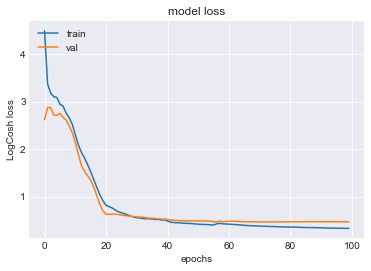

In [81]:
model_obj.model_loss(load_history,'LogCosh')

In [22]:
# Get a test and valid prediction for a logcosh loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [23]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 18s 8ms/step - loss: 0.0072


0.007214703131467104

In [24]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  kmeans_clusters  \
0             109.704459                0   
1             107.480757                0   
2             104.355574                0   
3              90.295322                0   
4              94.068587                0   

                                 validate_prediction  \
0  [[0.11576422], [0.115941115], [0.116113015], [...   
1  [[0.11804547], [0.11992749], [0.12121911], [0....   
2  [[0.10344955], [0.100460514], [0.097644605], [...   
3  [[0.11448817], [0.11456558], [0.1141653], [0.1...   
4  [[0.094341256], [0.09259936], [0.09087719], [0...   

                                     test_prediction  
0  [[0.0921648], [0.0902049], [0.08837297], [0.08...  
1  [[0.08336727], [0.08603555], [0.09020577], [0....  
2  [[0.10442895], [0.10367348], [0.102568775], [0...  
3  [[0.084735595], [0.084746644], [0.08542649], [...  
4  [[0.11936211], [0.119426206], [0.1187789], [0....

### Visualization of words prediction - LogCosh loss

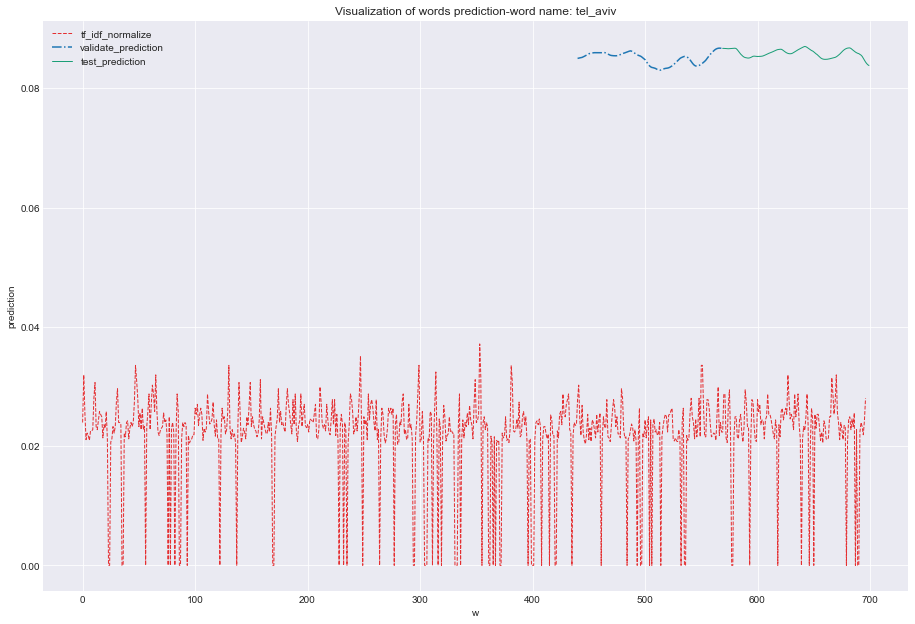

In [25]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

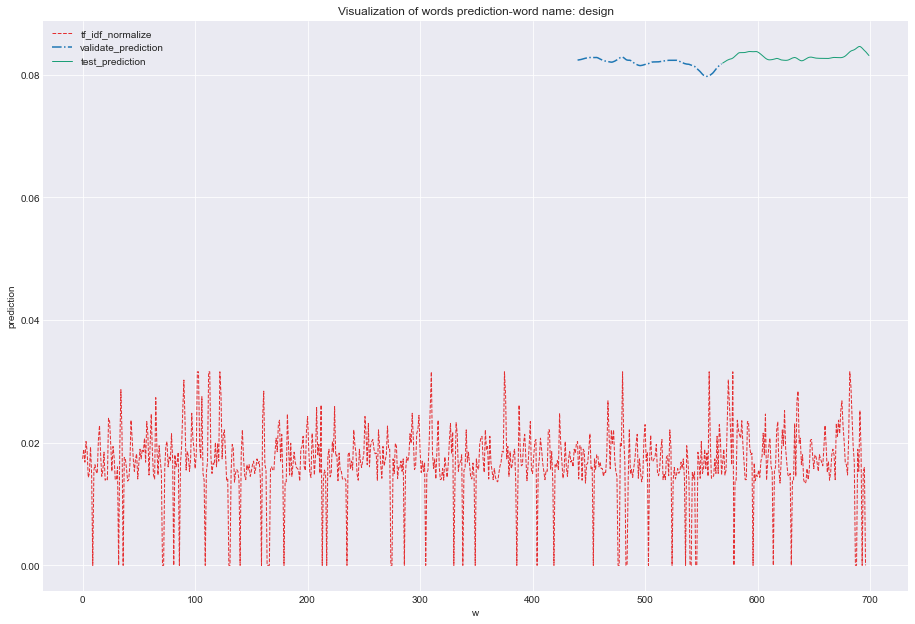

In [26]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

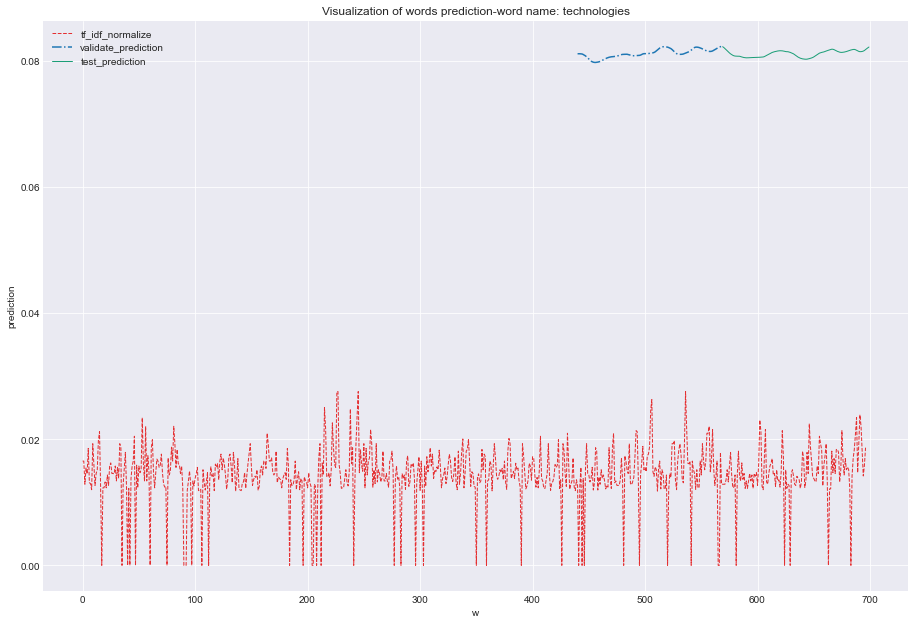

In [27]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

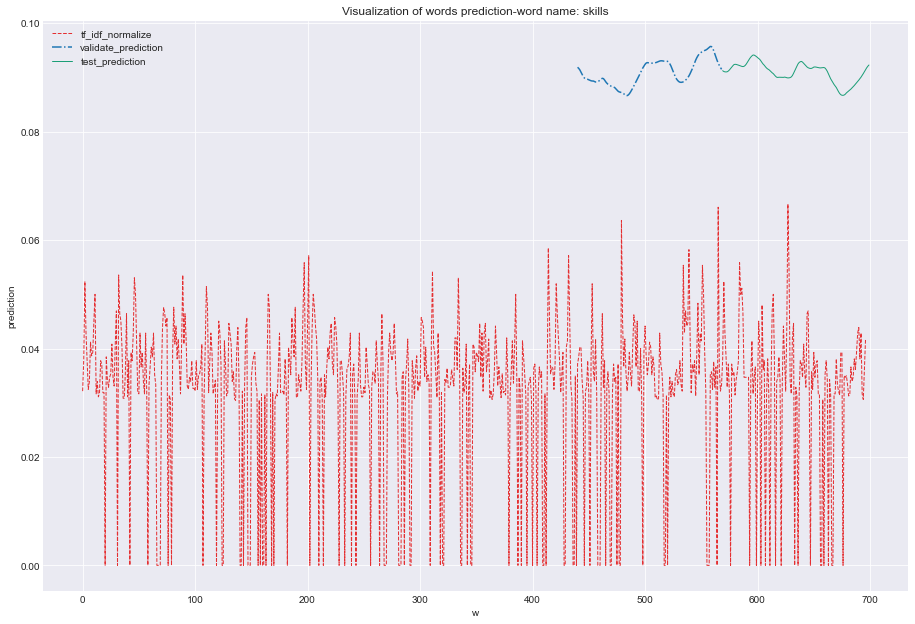

In [28]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

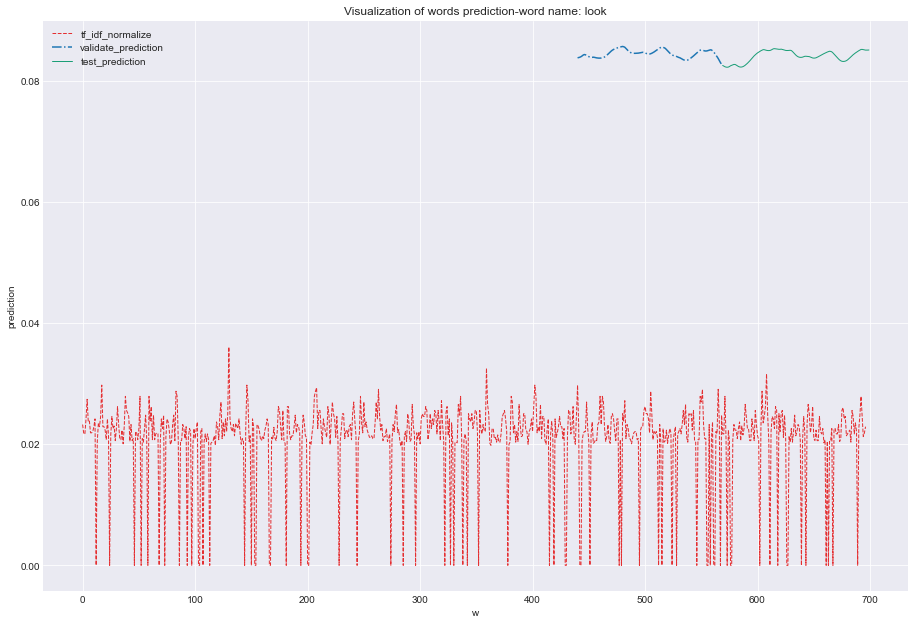

In [29]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

# Huber

In [30]:
name_model='model_LSTM_cluster/Huber_LSTM_kmeans_cluster_model_v2'
name_history='history_LSTM_cluster/Huber_LSTM_kmeans_cluster_v2_history'

In [31]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_LSTM(n_features,n_steps,tf.keras.losses.Huber())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [32]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 20)            3280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


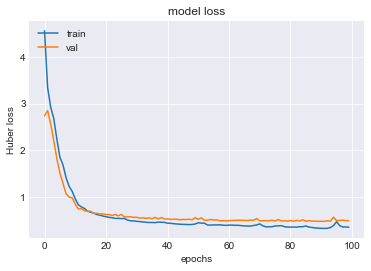

In [33]:
model_obj.model_loss(load_history,'Huber')

In [34]:
# Get a test and valid prediction for a Huber loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [35]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 18s 8ms/step - loss: 0.0065


0.006486393511295319

In [36]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  kmeans_clusters  \
0             109.704459                0   
1             107.480757                0   
2             104.355574                0   
3              90.295322                0   
4              94.068587                0   

                                 validate_prediction  \
0  [[0.10094797], [0.100372255], [0.09984229], [0...   
1  [[0.0966556], [0.09762105], [0.09806218], [0.0...   
2  [[0.08178095], [0.078581974], [0.07541397], [0...   
3  [[0.092090756], [0.09198134], [0.0914694], [0....   
4  [[0.0633], [0.061517768], [0.059683584], [0.05...   

                                     test_prediction  
0  [[0.061195143], [0.059156373], [0.0571459], [0...  
1  [[0.040552497], [0.043028913], [0.04691752], [...  
2  [[0.07126761], [0.07092094], [0.07021461], [0....  
3  [[0.050953507], [0.050498553], [0.05065287], [...  
4  [[0.08560087], [0.086628996], [0.0869781], [0....

### Visualization of words prediction - Huber loss

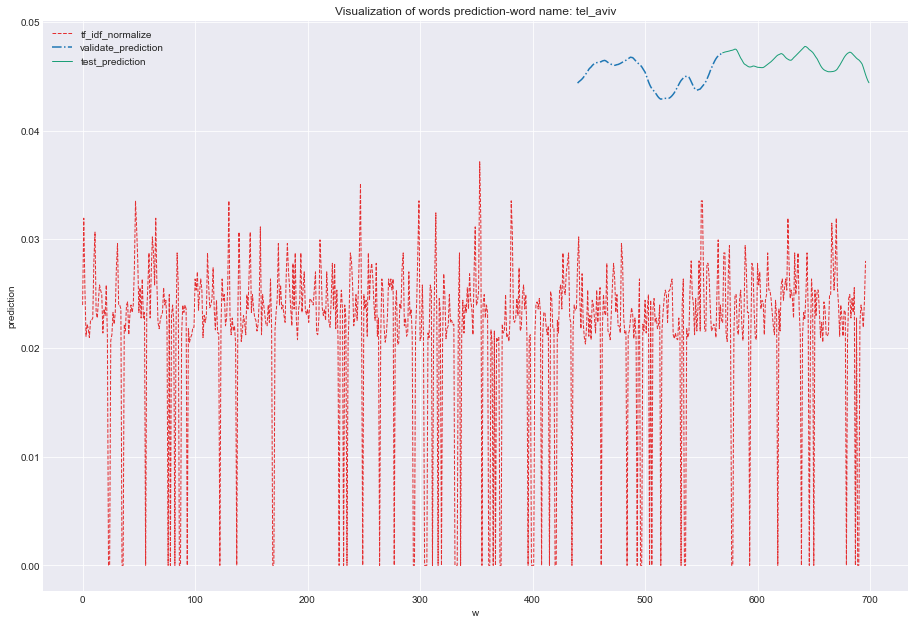

In [37]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

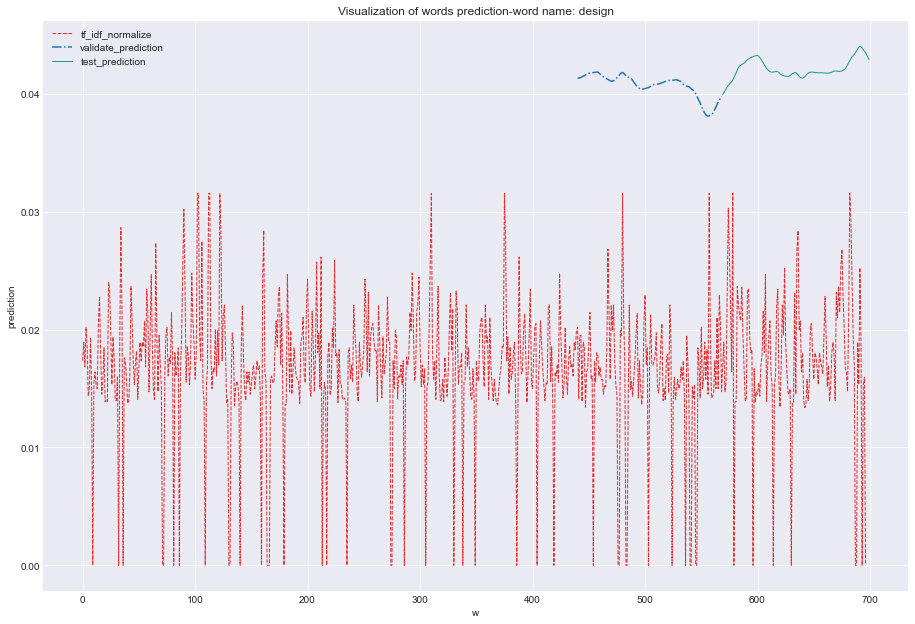

In [38]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

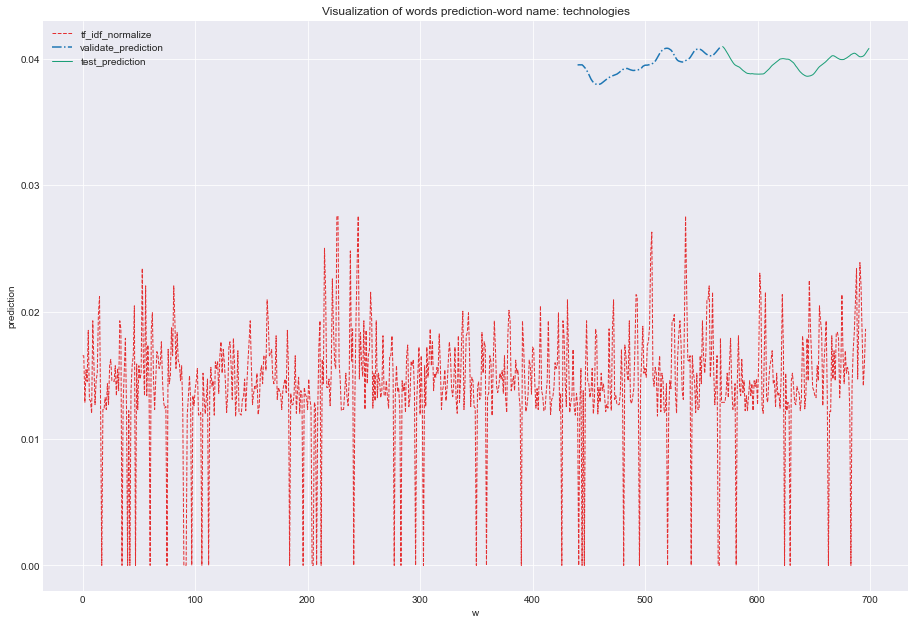

In [39]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

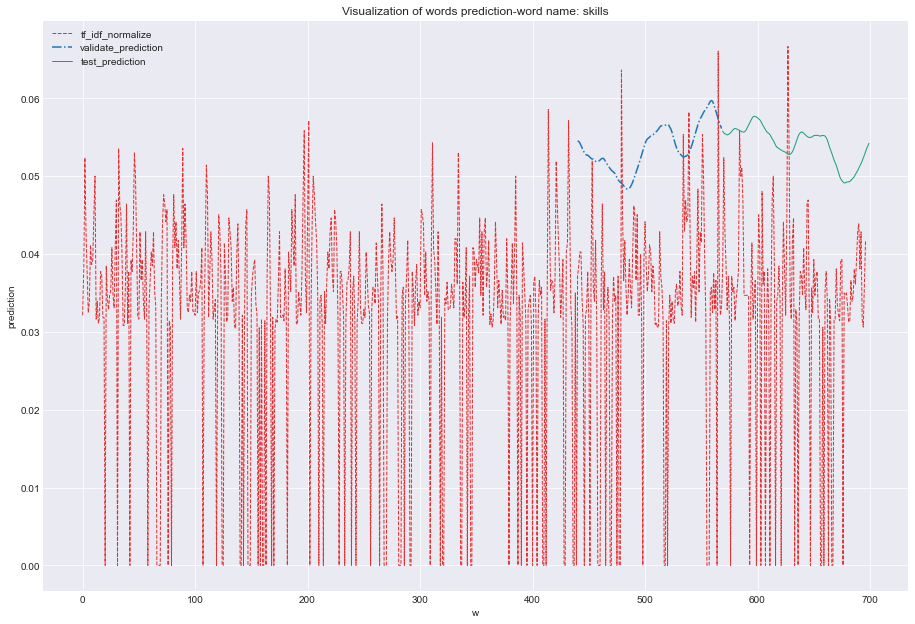

In [40]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

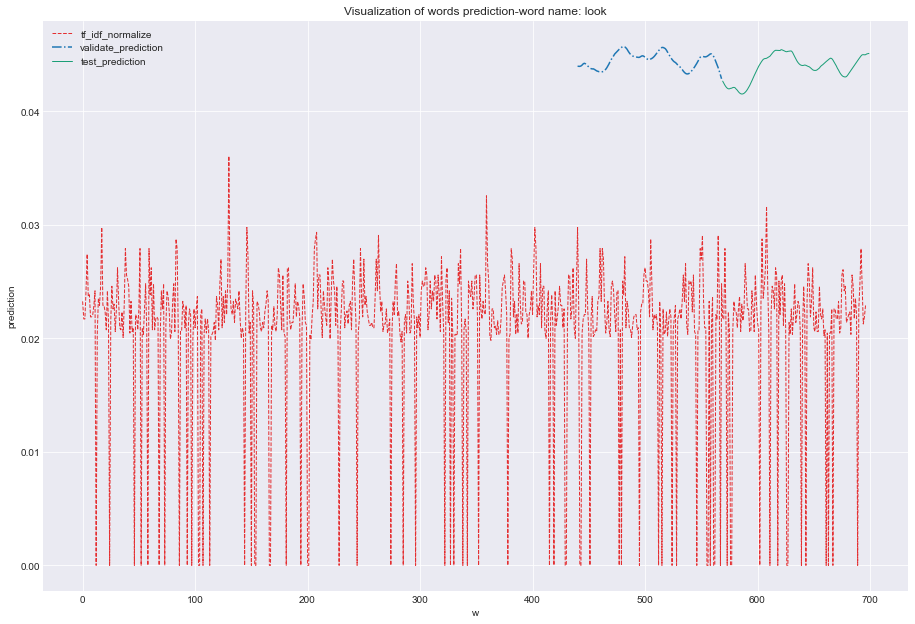

In [41]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

## Logarithmic

In [42]:
name_model='model_LSTM_cluster/Logarithmic_LSTM_kmeans_cluster_model_v2'
name_history='history_LSTM_cluster/Logarithmic_LSTM_kmeans_cluster_v2_history'

In [43]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_LSTM(n_features,n_steps, tf.keras.losses.MeanSquaredLogarithmicError())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [44]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 20)            1760      
_________________________________________________________________
lstm_4 (LSTM)                (None, 50, 20)            3280      
_________________________________________________________________
lstm_5 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


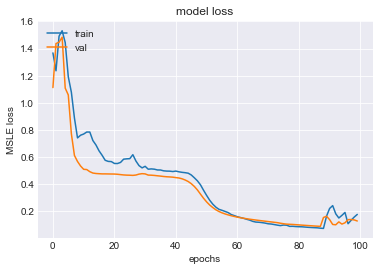

In [45]:
model_obj.model_loss(load_history,'MSLE')

In [46]:
# Get a test and valid prediction for a MSLE loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [47]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 27s 13ms/step - loss: 0.0221


0.022124316543340683

In [48]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  kmeans_clusters  \
0             109.704459                0   
1             107.480757                0   
2             104.355574                0   
3              90.295322                0   
4              94.068587                0   

                                 validate_prediction  \
0  [[0.19149095], [0.1912624], [0.19119209], [0.1...   
1  [[0.191645], [0.19292024], [0.19397563], [0.19...   
2  [[0.1833674], [0.18113121], [0.17899702], [0.1...   
3  [[0.18976504], [0.18989784], [0.18976665], [0....   
4  [[0.1755707], [0.17430529], [0.17303638], [0.1...   

                                     test_prediction  
0  [[0.17424583], [0.17278409], [0.17140132], [0....  
1  [[0.16595542], [0.16752872], [0.17002933], [0....  
2  [[0.18231621], [0.18197781], [0.18135902], [0....  
3  [[0.16839135], [0.1680445], [0.16818705], [0.1...  
4  [[0.19251929], [0.19292837], [0.19282544], [0....

### Visualization of words prediction - MSLE loss

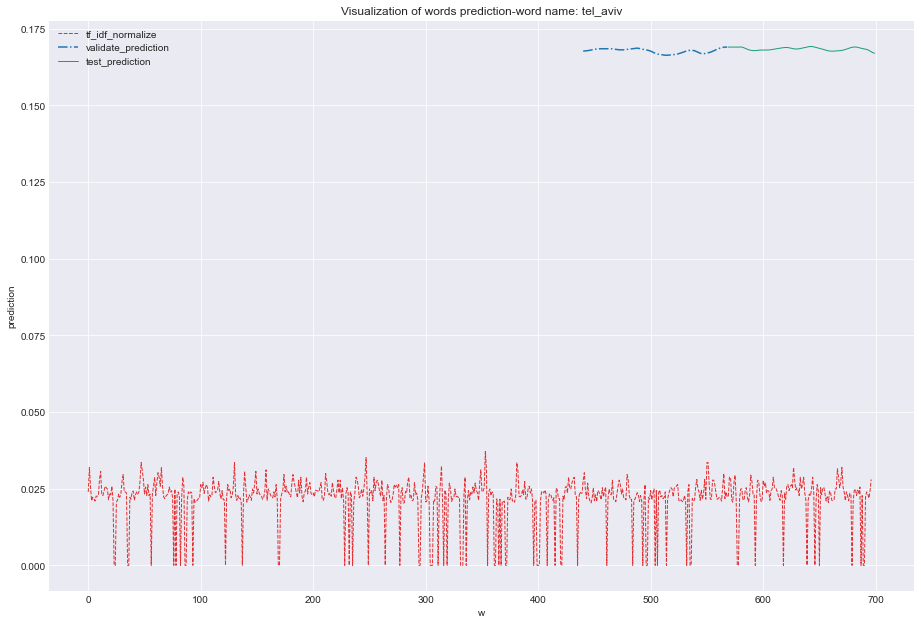

In [49]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

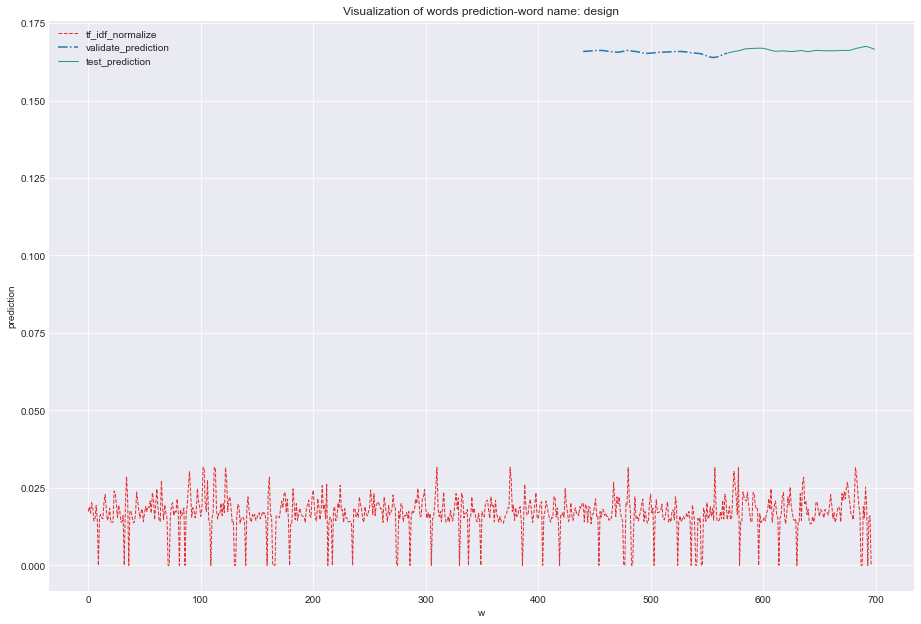

In [50]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

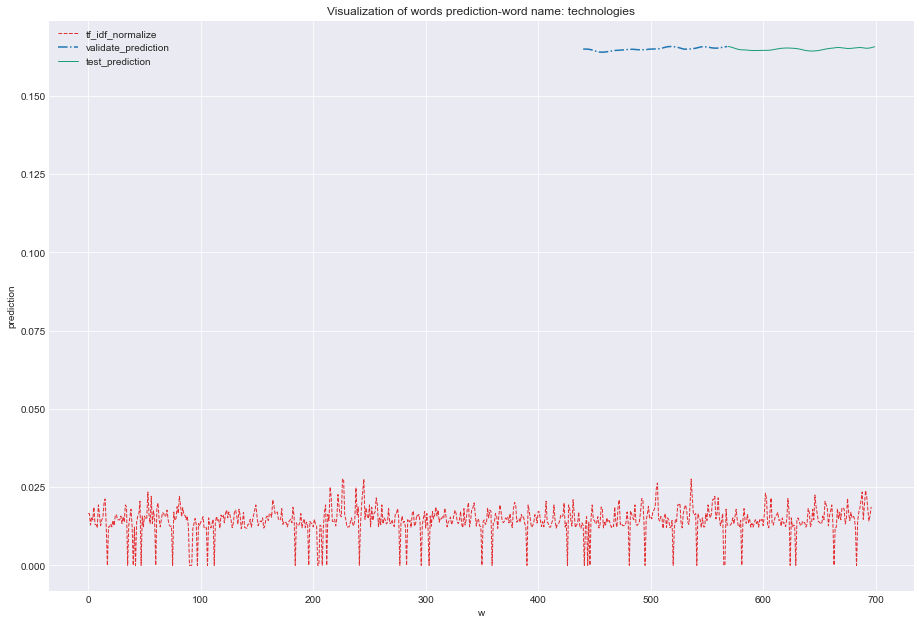

In [51]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

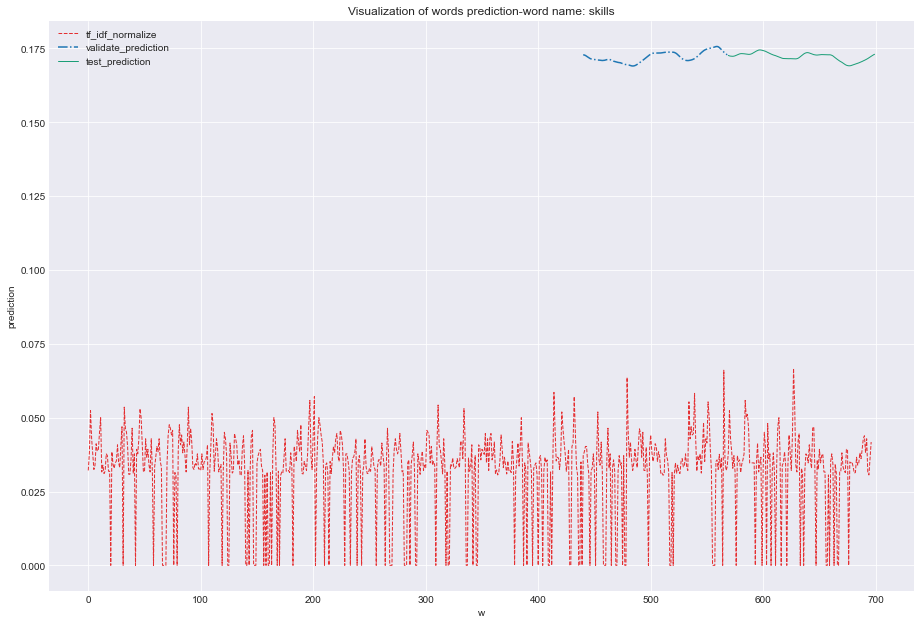

In [52]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

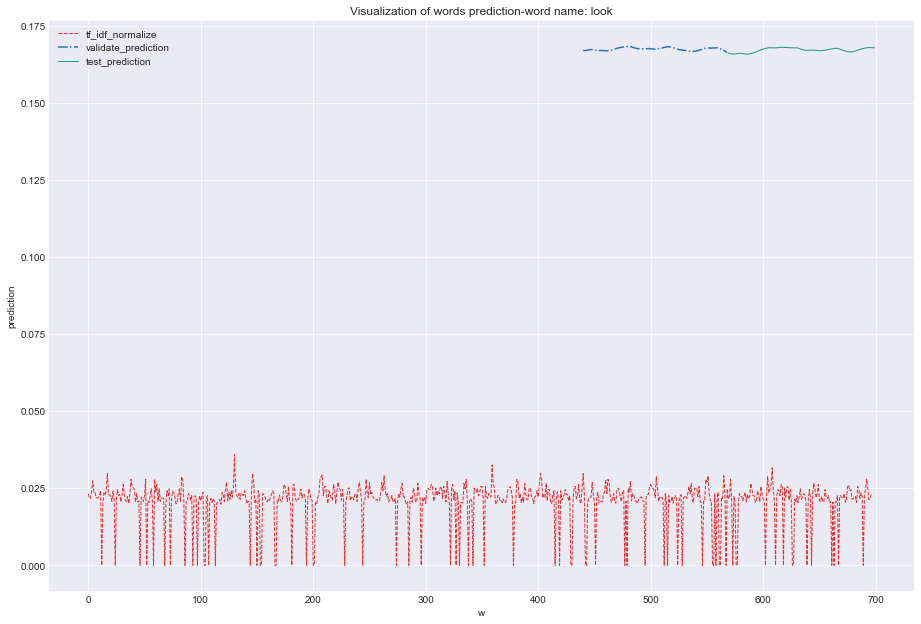

In [53]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

## MAE

In [54]:
name_model='model_LSTM_cluster/MAE_LSTM_kmeans_cluster_model_v2'
name_history='history_LSTM_cluster/MAE_LSTM_kmeans_cluster_v2_history'

In [55]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_LSTM(n_features,n_steps, tf.keras.losses.MeanAbsoluteError())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [56]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 20)            3280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


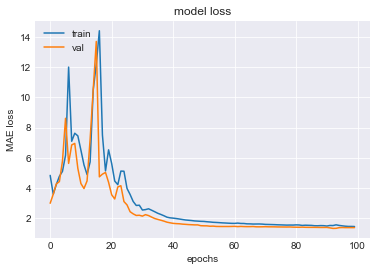

In [57]:
model_obj.model_loss(load_history,'MAE')

In [58]:
# Get a test and valid prediction for a MAE loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [59]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 31s 14ms/step - loss: 0.1276


0.1276034563779831

In [60]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  kmeans_clusters  \
0             109.704459                0   
1             107.480757                0   
2             104.355574                0   
3              90.295322                0   
4              94.068587                0   

                                 validate_prediction  \
0  [[0.14232293], [0.14254071], [0.1426869], [0.1...   
1  [[0.14313725], [0.14345449], [0.1435793], [0.1...   
2  [[0.14041701], [0.14022033], [0.14005034], [0....   
3  [[0.14252776], [0.14257601], [0.14249751], [0....   
4  [[0.140095], [0.13990818], [0.13974571], [0.13...   

                                     test_prediction  
0  [[0.13966283], [0.13954519], [0.13944674], [0....  
1  [[0.13995552], [0.14038017], [0.14106813], [0....  
2  [[0.14154738], [0.1413604], [0.14113693], [0.1...  
3  [[0.13927147], [0.13948116], [0.13976207], [0....  
4  [[0.14306664], [0.14290756], [0.14265355], [0....

### Visualization of words prediction - MAE loss

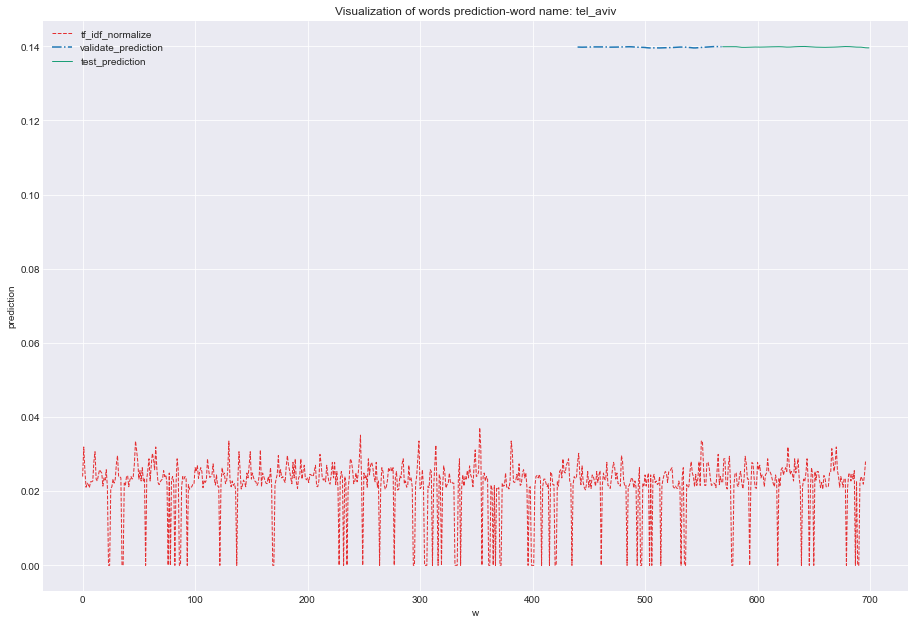

In [61]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

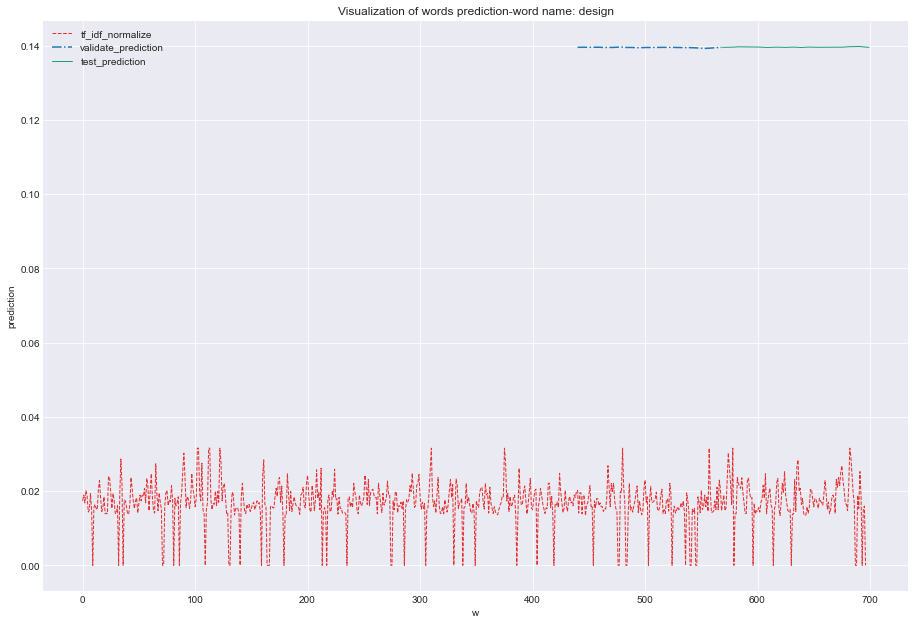

In [62]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

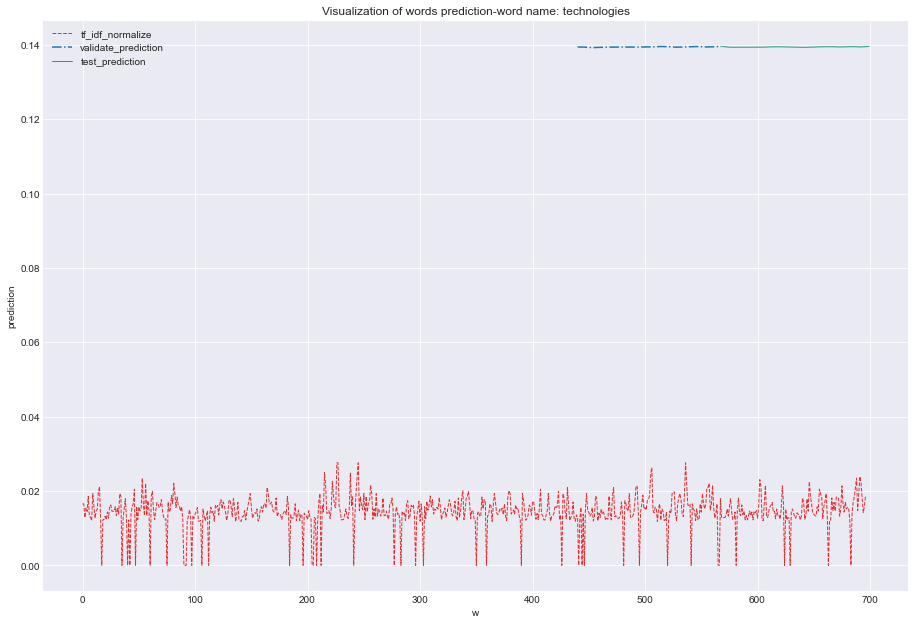

In [63]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

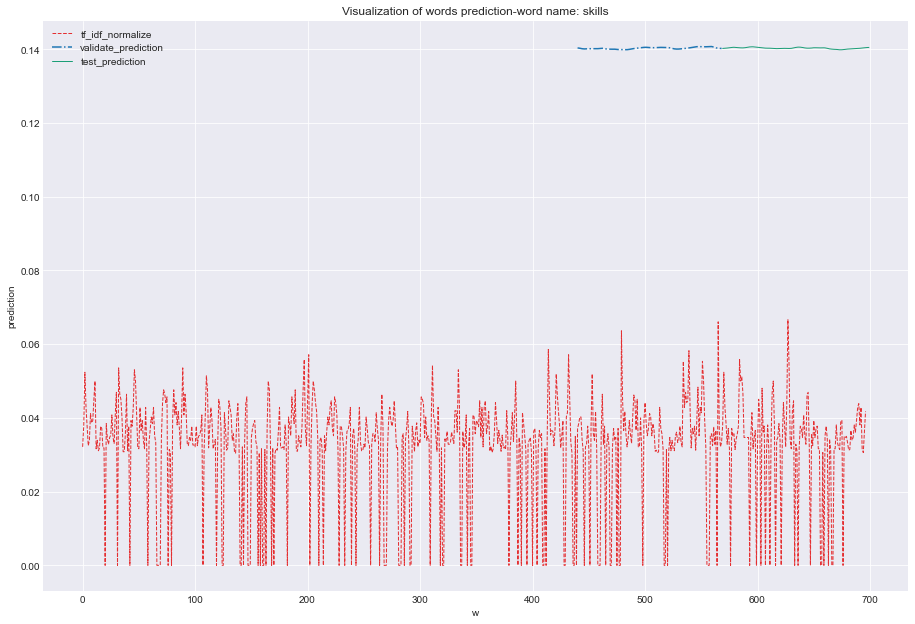

In [64]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

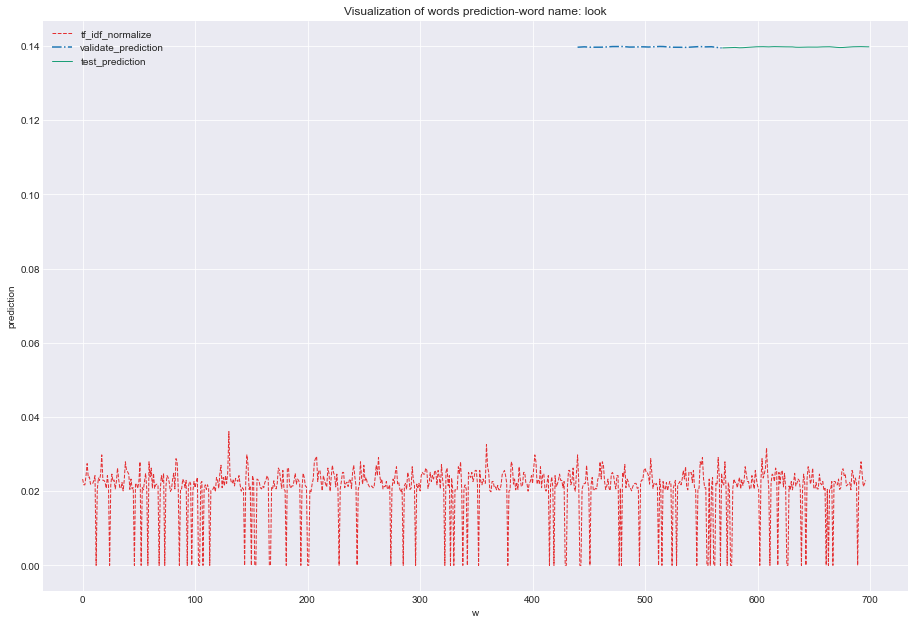

In [65]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

## MSE

In [66]:
name_model='model_LSTM_cluster/MSE_LSTM_kmeans_cluster_model_v2'
name_history='history_LSTM_cluster/MSE_LSTM_kmeans_cluster_v2_history'

In [67]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_LSTM(n_features,n_steps, tf.keras.losses.MeanSquaredError())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [68]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 20)            1760      
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 20)            3280      
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


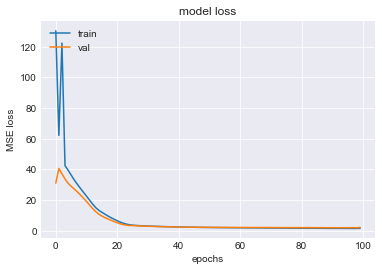

In [69]:
model_obj.model_loss(load_history,'MSE')

In [70]:
# Get a test and valid prediction for a MSE loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [71]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 33s 15ms/step - loss: 0.0479


0.04793037846684456

In [72]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  kmeans_clusters  \
0             109.704459                0   
1             107.480757                0   
2             104.355574                0   
3              90.295322                0   
4              94.068587                0   

                                 validate_prediction  \
0  [[0.2573986], [0.25744197], [0.25745973], [0.2...   
1  [[0.25784254], [0.25842038], [0.2587829], [0.2...   
2  [[0.25224406], [0.25116652], [0.2501444], [0.2...   
3  [[0.25633323], [0.25633574], [0.2561778], [0.2...   
4  [[0.24854937], [0.24791601], [0.2472848], [0.2...   

                                     test_prediction  
0  [[0.24764672], [0.24693629], [0.24626887], [0....  
1  [[0.2439633], [0.24497834], [0.24653819], [0.2...  
2  [[0.2519516], [0.2517023], [0.25133017], [0.25...  
3  [[0.24486452], [0.24490628], [0.24514109], [0....  
4  [[0.2573288], [0.2573826], [0.2571915], [0.256...

### Visualization of words prediction - MSE loss

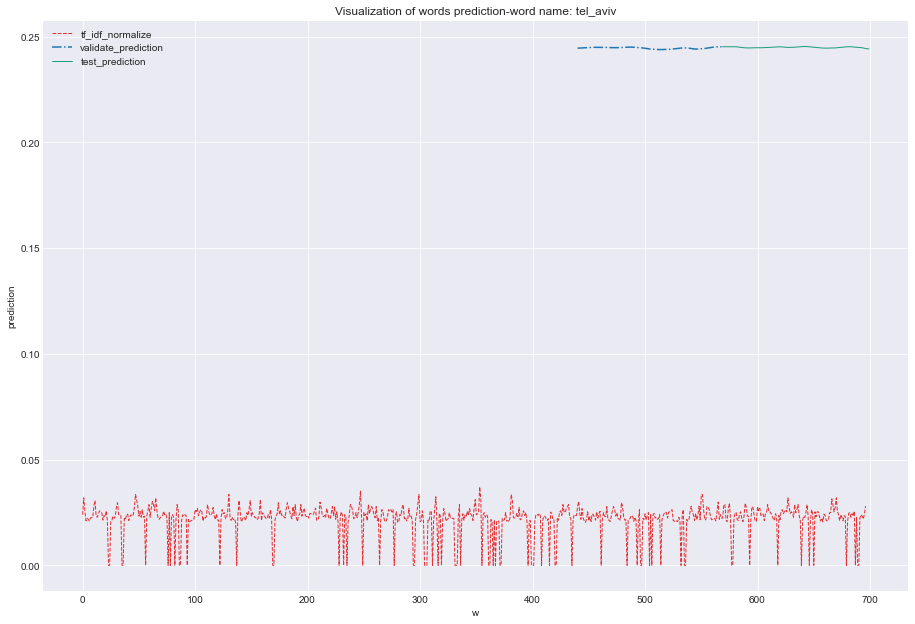

In [73]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

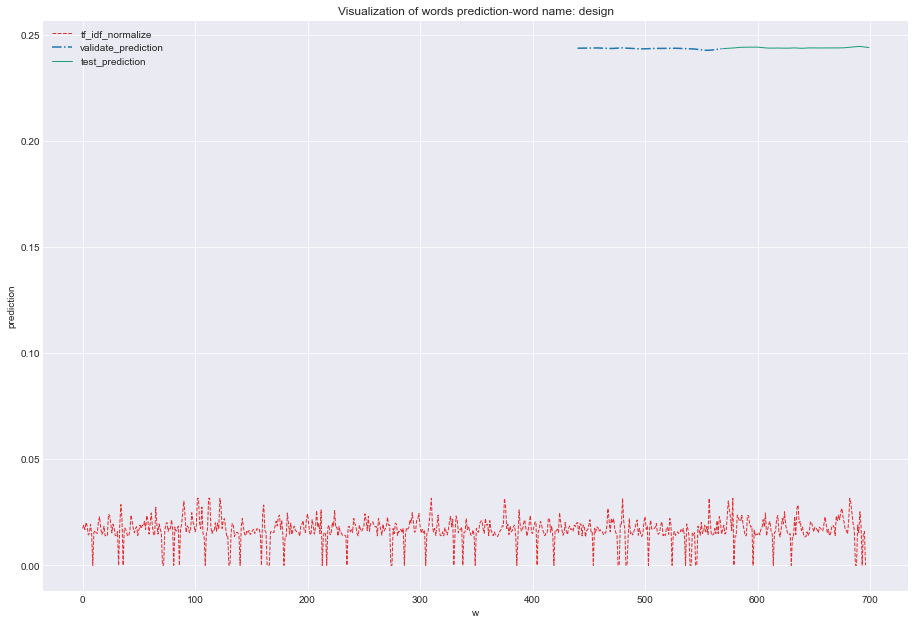

In [74]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

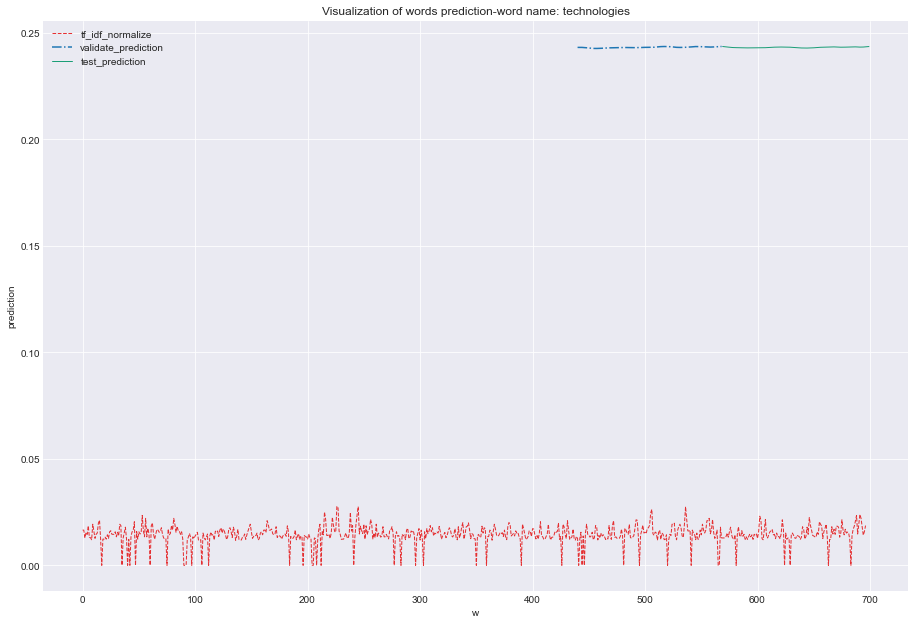

In [75]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

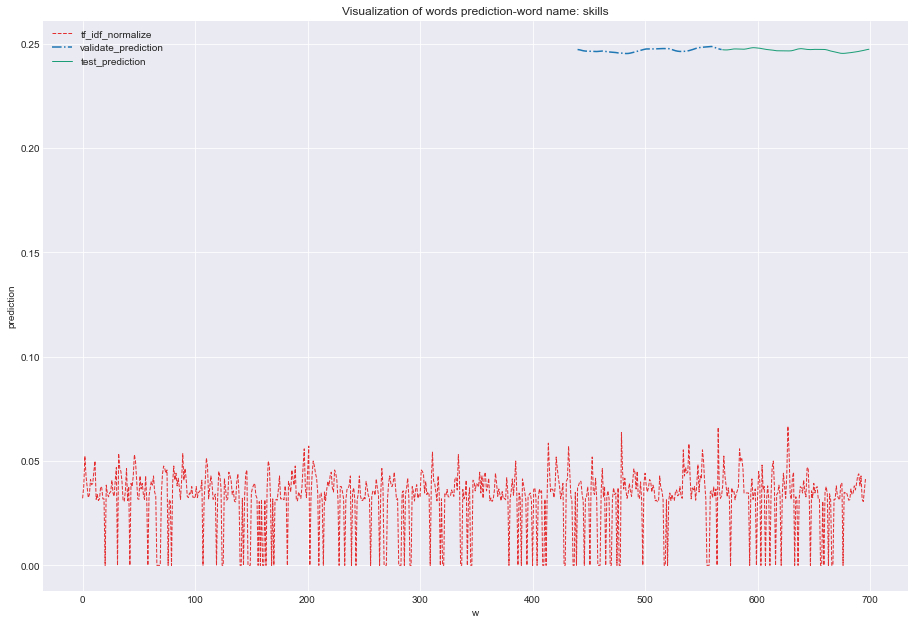

In [76]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

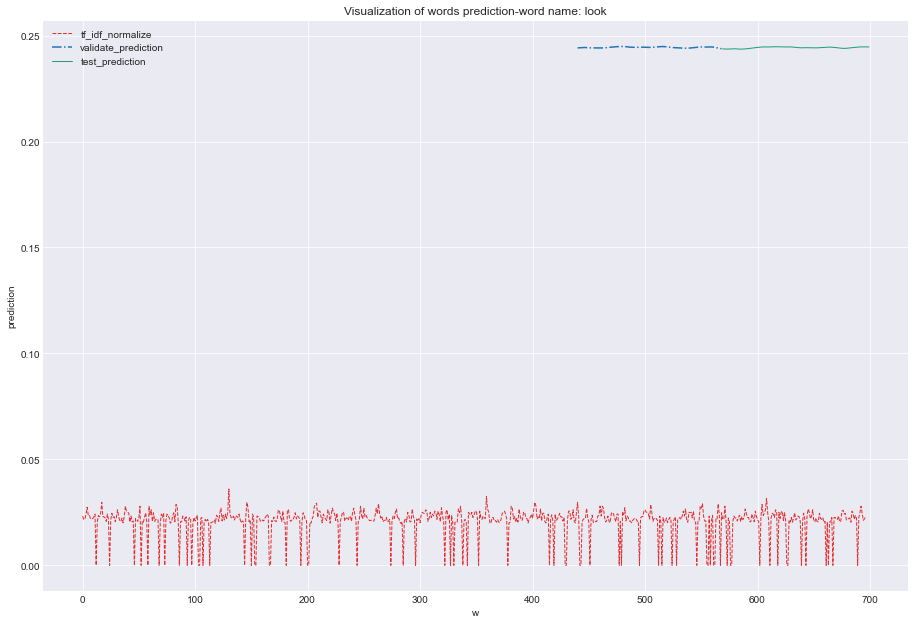

In [77]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)